<a href="https://colab.research.google.com/github/paula-belr/series-temporais-temperatura/blob/main/atividade_extensionista_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Tendências e Impacto das Mudanças Climáticas em Uberlândia-MG: Evidências a partir da Análise Exploratória de Séries Temporais de Temperatura.**

### Atividades a serem realizadas

1.  **Coleta de dados**: Os dados foram coletados no site do Instituto Nacional de Meteorologia (INMET). Em Uberlândia, existem três estações reponsáveis pela coleta de dados meteorológicos, porém utilizarei os dados de apenas uma para este trabalho, a estação automática. Nesta, os dados de precipitação total (mm), pressão atmosférica (mB), temperatura máxima, média e mínima diária (°C), umidade do ar (%) e velocidade do vento (m/s) são medidas de forma automática pelos instrumentos de medida.

2.  **Processamento de dados**: Nesta etapa, vamos preparar os dados para a  análise, para isso, precisamos verficar se nosso conjunto de dados possui dados faltantes, inconsistências e se os dados precisam de alguma transformação, como de tipagem ou criação de novas variáveis.

3. **Análise de Dados**: Aqui é onde vamos utilizar a linguagem Python e bibliotecas como Pandas, Numpy, Seaborn, Matplotlib e Prophet para extraírmos informações importantes e responder às nossas perguntas. Para melhor entendimento, dividi este processo em subtarefas, são elas:

  * **Análise Exploratória de Dados (AED)**: Pela qual investigamos nosso conjunto de dados, desde a visualização à utilização de métricas, para identificar padrões entre as variáveis;

  * **Previsão**: Onde utilizaresmos a biblioteca Prophet para fazer previsão de temperatura para um ano;

  * **Visualização**: Onde criaremos uma representação visual para facilitar a compreensão.


### Importando as bibliotecas que serão utilizadas nas etapas de processamento e análise dos dados.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
# from statsmodels.tsa.stattools import adfuller

In [22]:
!pip install prophet
from prophet import Prophet

### Processamento dos Dados

#### Dados da estação automática

O intervalo dos dados para esta estação é:

* Começo: 01/01/2005
* Final: 31/12/2024

##### Dados da estação automática antes do processamento.

Aqui temos um vislumbre de como são nossos dados, quais variáveis teremos disponíveis para explorar, quais as unidades de medida dos dados, além disso, temos dados faltantes, também chamados de 'missing values', casas decimais separadas por vírgula e uma coluna que não traz nenhum dado.

In [23]:
# Carregamento dos dados
df_auto = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dados-atividade-extensionista/estacoes-auto-uberlandia-a507-01-01-2005-31-12-2024/dados_A507_D_2005-01-01_2024-12-31.csv',
                      sep = ';')

df_auto.head()

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)",Unnamed: 8
0,2005-01-01,"5,6",916,"29,6","23,3","18,9","73,1","1,4",NaN
1,2005-01-02,NaN,NaN,NaN,NaN,NaN,"69,3",NaN,NaN
2,2005-01-03,"13,8","916,6","26,8",NaN,"17,8","81,4","2,6",NaN
3,2005-01-04,NaN,"914,9","26,5",NaN,"19,1",82,"2,5",NaN
4,2005-01-05,NaN,NaN,"27,1",NaN,"19,6","78,4",NaN,NaN


##### Processamento dos dados


Utilizarei essa seção para fazer a limpeza dos dados e colocá-los em um formato útil para análise posterior e previsão.

###### Limpeza dos dados

Excluir colunas que sem relevância, trocar nome das colunas existentes

In [24]:
# Visualizando o nome de todas as colunas do Dataframe
df_auto.columns

Index(['Data Medicao', 'PRECIPITACAO TOTAL, DIARIO (AUT)(mm)',
       'PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)',
       'TEMPERATURA MAXIMA, DIARIA (AUT)(°C)',
       'TEMPERATURA MEDIA, DIARIA (AUT)(°C)',
       'TEMPERATURA MINIMA, DIARIA (AUT)(°C)',
       'UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)',
       'VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)', 'Unnamed: 8'],
      dtype='object')

In [25]:
# renomear colunas
df_auto = df_auto.rename(columns = {'Data Medicao': 'Data da Medição',
                                    'PRECIPITACAO TOTAL, DIARIO (AUT)(mm)': 'Precipitação total (mm)',
                                    'PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)':'Pressão atmosférica (mB)',
                                    'TEMPERATURA MAXIMA, DIARIA (AUT)(°C)': 'Temp. Max (°C)',
                                    'TEMPERATURA MEDIA, DIARIA (AUT)(°C)': 'Temp. Med (°C)',
                                    'TEMPERATURA MINIMA, DIARIA (AUT)(°C)': 'Temp. Min (°C)',
                                    'UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)': 'Umidade relativa do ar (%)',
                                    'VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)': 'Vento, rajada máx. (m/s)',
                                    'VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)': 'Vento, velocidade média (m/s)'})

# Excluindo uma coluna que não será utilizada
df_auto = df_auto.drop(['Unnamed: 8'], axis = 1)
df_auto

,Data da Medição,Precipitação total (mm),Pressão atmosférica (mB),Temp. Max (°C),Temp. Med (°C),Temp. Min (°C),Umidade relativa do ar (%),"Vento, velocidade média (m/s)"
0,2005-01-01,"5,6",916,"29,6","23,3","18,9","73,1","1,4"
1,2005-01-02,NaN,NaN,NaN,NaN,NaN,"69,3",NaN
2,2005-01-03,"13,8","916,6","26,8",NaN,"17,8","81,4","2,6"
3,2005-01-04,NaN,"914,9","26,5",NaN,"19,1",82,"2,5"
4,2005-01-05,NaN,NaN,"27,1",NaN,"19,6","78,4",NaN
...,...,...,...,...,...,...,...,...
7300,2024-12-27,"20,6","915,8","23,8","21,2","19,6","88,1","1,6"
7301,2024-12-28,"8,6","916,1","27,9","22,6","20,5","81,7","1,4"
7302,2024-12-29,"6,4","914,6","25,9","22,4","20,3","83,1","1,4"
7303,2024-12-30,",8","914,2","30,4",24,"20,7","72,8",2


Com o método `.info` do Pandas, vamos obter algumas informações sobre nosso Dataframe, como total de linhas e colunas, quantidade de dados não nulos, o tipo de dado de cada coluna e o uso de memória.

In [26]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7305 entries, 0 to 7304
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Data da Medição                7305 non-null   object
 1   Precipitação total (mm)        6908 non-null   object
 2   Pressão atmosférica (mB)       7064 non-null   object
 3   Temp. Max (°C)                 7102 non-null   object
 4   Temp. Med (°C)                 6952 non-null   object
 5   Temp. Min (°C)                 7108 non-null   object
 6   Umidade relativa do ar (%)     7146 non-null   object
 7   Vento, velocidade média (m/s)  7060 non-null   object
dtypes: object(8)
memory usage: 456.7+ KB


###### Transformação dos dados

Aqui, vamos tratar tanto da separação decimal, substituindo a vírgula por ponto, quanto de alterar os tipos de dados, transformando de 'object' para 'datetime64[ns]' as datas de medição e para 'float64' os dados das colunas restantes.

In [27]:
# Substituindo as vírgulas que separam a parte decimal por pontos.
df_auto['Pressão atmosférica (mB)'] = df_auto['Pressão atmosférica (mB)'].str.replace(',', '.')
df_auto['Precipitação total (mm)'] = df_auto['Precipitação total (mm)'].str.replace(',', '.')
df_auto['Temp. Max (°C)'] = df_auto['Temp. Max (°C)'].str.replace(',', '.')
df_auto['Temp. Med (°C)'] = df_auto['Temp. Med (°C)'].str.replace(',', '.')
df_auto['Temp. Min (°C)'] = df_auto['Temp. Min (°C)'].str.replace(',', '.')
df_auto['Umidade relativa do ar (%)'] = df_auto['Umidade relativa do ar (%)'].str.replace(',', '.')
df_auto['Vento, velocidade média (m/s)'] = df_auto['Vento, velocidade média (m/s)'].str.replace(',', '.')

# Alterando o tipo dos dados
df_auto = df_auto.astype({'Data da Medição': 'datetime64[ns]'})
df_auto = df_auto.astype({'Pressão atmosférica (mB)': 'float64'})
df_auto = df_auto.astype({'Precipitação total (mm)': 'float64'})
df_auto = df_auto.astype({'Temp. Max (°C)': 'float64'})
df_auto = df_auto.astype({'Temp. Med (°C)': 'float64'})
df_auto = df_auto.astype({'Temp. Min (°C)': 'float64'})
df_auto = df_auto.astype({'Umidade relativa do ar (%)': 'float64'})
df_auto = df_auto.astype({'Vento, velocidade média (m/s)': 'float64'})

df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7305 entries, 0 to 7304
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Data da Medição                7305 non-null   datetime64[ns]
 1   Precipitação total (mm)        6908 non-null   float64       
 2   Pressão atmosférica (mB)       7064 non-null   float64       
 3   Temp. Max (°C)                 7102 non-null   float64       
 4   Temp. Med (°C)                 6952 non-null   float64       
 5   Temp. Min (°C)                 7108 non-null   float64       
 6   Umidade relativa do ar (%)     7146 non-null   float64       
 7   Vento, velocidade média (m/s)  7060 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 456.7 KB


###### Preenchendo Lacunas

Restaram ainda, os valores faltantes para serem tratados, pois utilizando novamente o método `.info`, é possível ver que a coluna 'Non-Null Count' apresenta valores diferentes para cada coluna.

Para isso, será utilizado o método `.interpolate`, que é um procedimento matemático que permite estimar o valor de uma função utilizando valores já conhecidos da mesma.

In [29]:
# Completar os valores NaN da tabela com o método de interpolação de ordem 1.
numeric_cols_auto = ['Precipitação total (mm)',
                'Pressão atmosférica (mB)',
                'Temp. Max (°C)',
                'Temp. Med (°C)',
                'Temp. Min (°C)',
                'Umidade relativa do ar (%)',
                'Vento, velocidade média (m/s)']

df_auto_inter = df_auto.copy()
df_auto_inter[numeric_cols_auto] = df_auto[numeric_cols_auto].interpolate(axis = 0, method = 'polynomial', order = 1).round(1)

df_auto_inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7305 entries, 0 to 7304
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Data da Medição                7305 non-null   datetime64[ns]
 1   Precipitação total (mm)        7305 non-null   float64       
 2   Pressão atmosférica (mB)       7305 non-null   float64       
 3   Temp. Max (°C)                 7305 non-null   float64       
 4   Temp. Med (°C)                 7305 non-null   float64       
 5   Temp. Min (°C)                 7305 non-null   float64       
 6   Umidade relativa do ar (%)     7305 non-null   float64       
 7   Vento, velocidade média (m/s)  7305 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 456.7 KB


Utilizando o método `.info` novamente, percebemos que todos os dados faltantes foram preenchidos, mas ainda pode gerar dúvidas se esta foi a melhor decisão. Para isso, utilizarei outro método, `.describe`, que fornece uma estatística descritiva de um conjunto de dados.

Observando a descrição estatística antes e depois de aplicada a interpolação, notamos pouca variação das estatísticas de forma geral, indicando uma preservação da distribuição dos dados e sugerindo que os valores imputados se encaixam bem no contexto dos dados originais e não introduziram viés.

In [33]:
# Estatística Descritiva do conjunto de dados ANTES de processamento.
df_auto[numeric_cols_auto].describe()

,Precipitação total (mm),Pressão atmosférica (mB),Temp. Max (°C),Temp. Med (°C),Temp. Min (°C),Umidade relativa do ar (%),"Vento, velocidade média (m/s)"
count,6908.000000,7064.000000,7102.000000,6952.000000,7108.000000,7146.000000,7060.000000
mean,4.011262,917.238307,29.128668,23.324180,18.847876,59.743073,1.818017
std,10.299813,2.663849,2.774922,2.440673,2.646470,15.846976,0.582622
min,0.000000,908.100000,16.000000,10.800000,4.700000,16.300000,0.000000
25%,0.000000,915.400000,27.400000,21.800000,17.200000,48.400000,1.400000
50%,0.000000,917.000000,29.200000,23.300000,19.400000,60.600000,1.800000
75%,1.800000,919.125000,30.900000,24.900000,20.700000,72.300000,2.200000
max,111.000000,926.000000,38.500000,32.200000,27.200000,94.700000,4.400000


In [34]:
# Estatística Descritiva do conjunto de dados DEPOIS de processamento.
df_auto_inter[numeric_cols_auto].describe()

,Precipitação total (mm),Pressão atmosférica (mB),Temp. Max (°C),Temp. Med (°C),Temp. Min (°C),Umidade relativa do ar (%),"Vento, velocidade média (m/s)"
count,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000
mean,3.915318,917.246680,29.091034,23.285941,18.833320,60.027556,1.825079
std,10.084433,2.647017,2.754283,2.419272,2.638975,15.833872,0.576296
min,0.000000,908.100000,16.000000,10.800000,4.700000,16.300000,0.000000
25%,0.000000,915.500000,27.400000,21.800000,17.200000,48.800000,1.400000
50%,0.000000,917.100000,29.100000,23.300000,19.300000,61.000000,1.800000
75%,1.600000,919.100000,30.900000,24.800000,20.700000,72.700000,2.200000
max,111.000000,926.000000,38.500000,32.200000,27.200000,94.700000,4.400000


Podemos observar também, a partir de um gráfico, como ficou a distribuição dos dados para uma coluna específica, neste caso, a de temperatura média, mostrando a preservação da distribuição.

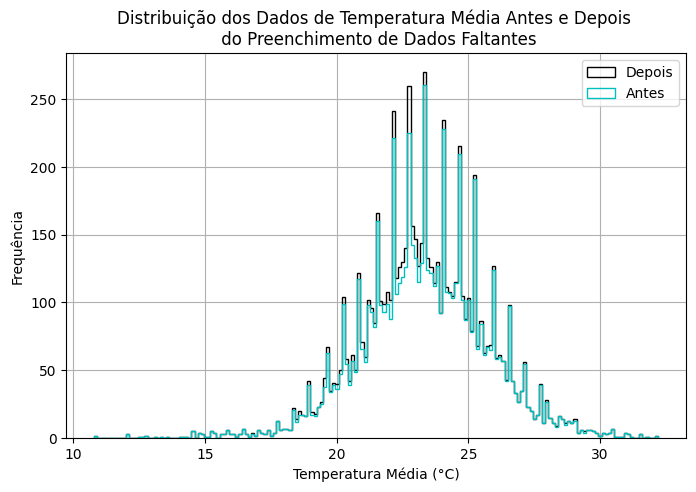

In [134]:
plt.figure(figsize = (8,5))

plt.hist(df_auto_inter['Temp. Med (°C)'],
         bins = len(df_auto['Temp. Med (°C)'].unique()),
         histtype = 'step',
         color = 'k',
         label = 'Depois')

plt.hist(df_auto['Temp. Med (°C)'],
         bins = len(df_auto['Temp. Med (°C)'].unique()),
         histtype  ='step',
         color = 'c',
         label = 'Antes')

plt.title('Distribuição dos Dados de Temperatura Média Antes e Depois \n do Preenchimento de Dados Faltantes')
plt.xlabel('Temperatura Média (°C)')
plt.ylabel('Frequência')
plt.grid()
plt.legend()
plt.show()

É possível visualizar como a série temporal ficou após o preenchimento dos dados, nesse caso, também para a coluna da temperatura média.

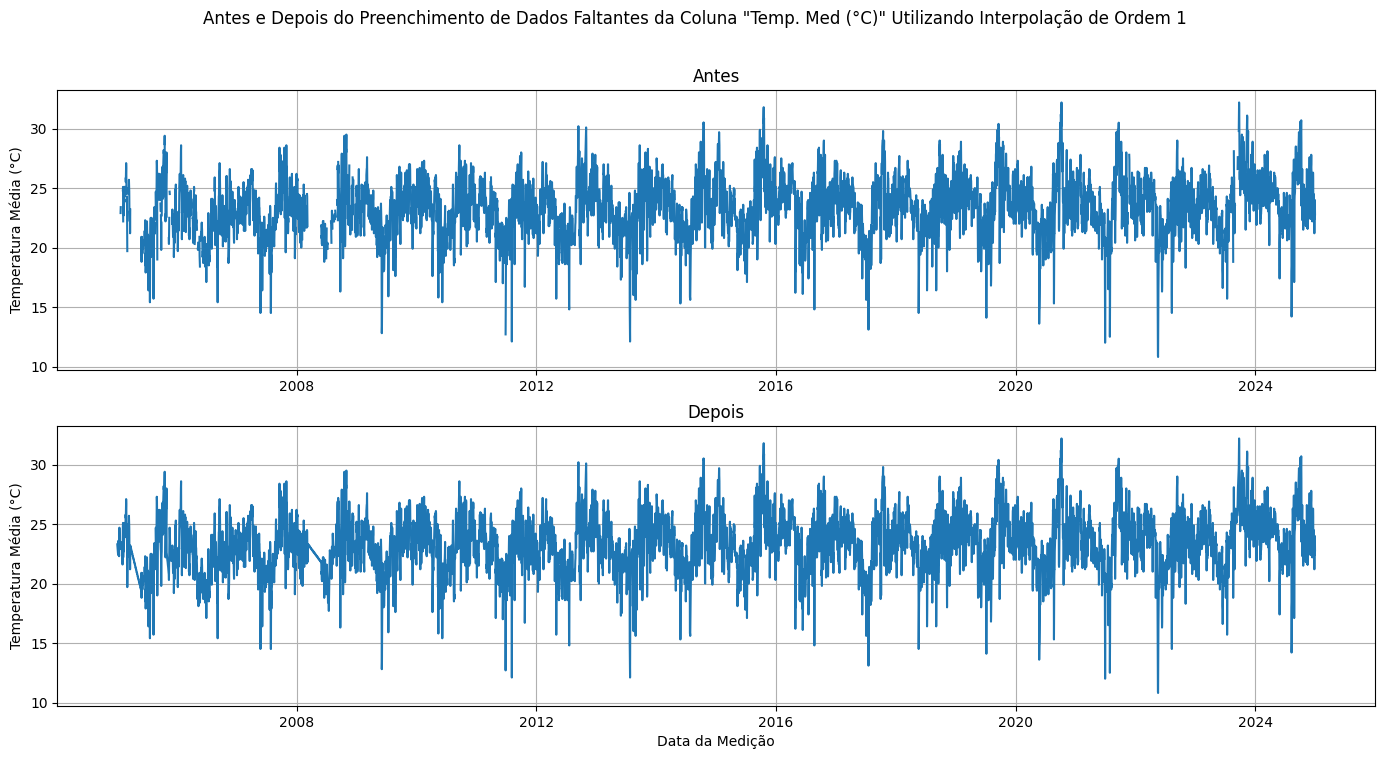

In [82]:
fig, ax = plt.subplots(2)
fig.suptitle('Antes e Depois do Preenchimento de Dados Faltantes da Coluna "Temp. Med (°C)" Utilizando Interpolação de Ordem 1')
fig.set_size_inches(17, 8)

ax[0].set_title('Antes')
ax[0].set_ylabel('Temperatura Média (°C)')
ax[0].plot(df_auto['Data da Medição'], df_auto['Temp. Med (°C)'])
ax[0].grid()

ax[1].set_title('Depois')
ax[1].plot(df_auto['Data da Medição'], df_auto_inter['Temp. Med (°C)'])
ax[1].set_ylabel('Temperatura Média (°C)')
ax[1].set_xlabel('Data da Medição')
ax[1].grid()

###### Dados da estação automática prontos para análise.

Depois de todos estes procedimentos, os dados estão completos, tipados corretamente e prontos para análise.

In [135]:
df_auto_inter.head()

,Data da Medição,Precipitação total (mm),Pressão atmosférica (mB),Temp. Max (°C),Temp. Med (°C),Temp. Min (°C),Umidade relativa do ar (%),"Vento, velocidade média (m/s)"
0,2005-01-01,5.6,916.0,29.6,23.3,18.9,73.1,1.4
1,2005-01-02,9.7,916.3,28.2,23.1,18.4,69.3,2.0
2,2005-01-03,13.8,916.6,26.8,22.9,17.8,81.4,2.6
3,2005-01-04,14.2,914.9,26.5,22.8,19.1,82.0,2.5
4,2005-01-05,14.6,915.2,27.1,22.6,19.6,78.4,2.2


### Análise de Dados

#### Análise Exploratória dos Dados

##### Correlação entre as variáveis

Será utilizado o método `.corr` no Dataframe, que calculará a correlação entre os pares de colunas. Utilizaremos a correlação padrão de Peason, que mede a relação linear entre duas variáveis

* Um valor próximo a +1 indica uma correlação positiva forte: quando uma variável aumenta, a outra tende a aumentar também;
* Um valor próximo a -1 indica uma correlação negativa forte: quando uma variável aumenta, a outra tende a diminuir;
* Um valor próxima a 0 indica que não há correlação linear entre as variáveis.

<Axes: >

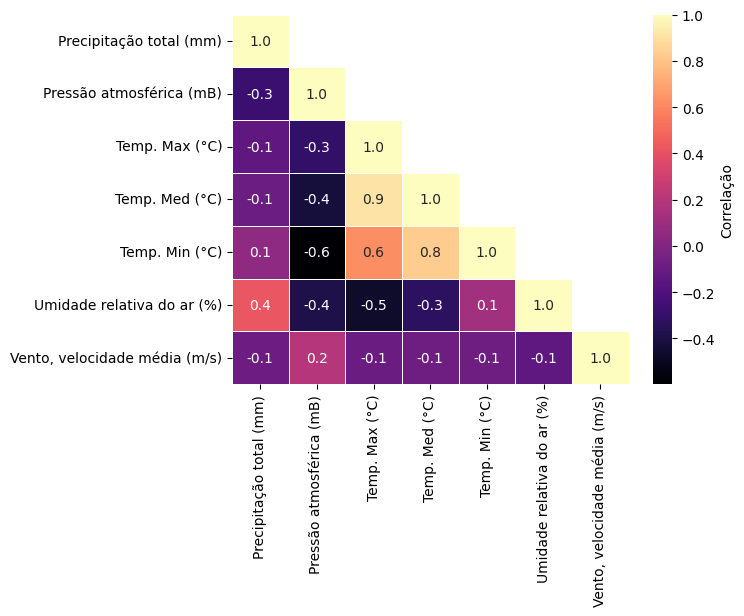

In [145]:
# Calculando a matriz de correlação
corr_matrix = df_auto_inter[numeric_cols_auto].corr(method = 'pearson')

# Criando uma máscara para mostrar apenas os elementos abaixo da diagonal
mask = np.triu(np.ones_like(corr_matrix), k = 1)

sns.heatmap(corr_matrix,
            annot = True,
            cbar_kws = {'label': 'Correlação'},
            cmap = 'magma',
            fmt = '.1f',
            mask = mask,
            linewidth = .5)

In [145]:
# Agrupar valores da tabela por ano e avaliar valores máximos e mínimos de cada
# coluna da tabela para fazer cálculos de medidas de dispersão, como por
# exemplo, amplitude.

df_resumido = df_auto_inter.groupby(df_auto_inter['Data da Medição'].dt.year).agg(['min', 'max', 'mean'])

df_resumido[numeric_cols_auto]

Precipitação total (mm)                   \
                                    min    max      mean   
Data da Medição                                            
2005                                0.0   31.8  3.409041   
2006                                0.0   83.4  4.321644   
2007                                0.0  110.8  3.961644   
2008                                0.0   82.4  2.911202   
2009                                0.0   74.0  3.969041   
2010                                0.0   67.8  3.609863   
2011                                0.0   63.2  4.167397   
2012                                0.0   85.2  3.997268   
2013                                0.0   86.6  4.665753   
2014                                0.0   52.0  3.116164   
2015                                0.0   64.2  4.120548   
2016                                0.0   81.8  4.645902   
2017                                0.0   78.0  3.718904   
2018                                0.0   94.0  4.423014   
2019                                0.0   89.8  3.452055   
2020                                0.0  111.0  4.526776   
2021                                0.0   73.8  3.484384   
2022                                0.0   84.8  3.881096   
2023                                0.0   95.2  3.695890   
2024                                0.0   63.2  4.226776   

                Pressão atmosférica (mB)                    Temp. Max (°C)  \
                                     min    max        mean            min   
Data da Medição                                                              
2005                               909.4  925.2  917.237534           20.9   
2006                               911.2  923.3  917.190411           21.5   
2007                               911.0  923.6  917.343562           16.8   
2008                               908.5  923.6  917.188525           21.2   
2009                               911.1  922.0  916.679452           18.3   
2010                               908.2  923.1  916.794521           21.0   
2011                               909.3  923.6  916.544658           17.3   
2012                               910.0  923.7  917.246721           20.9   
2013                               909.8  923.6  917.099726           16.7   
2014                               912.1  924.4  917.637260           16.4   
2015                               911.7  926.0  917.649863           19.5   
2016                               909.0  924.3  917.565847           22.0   
2017                               909.6  925.1  917.600274           20.5   
2018                               910.3  924.1  917.364384           19.4   
2019                               911.5  925.1  917.658082           20.7   
2020                               909.2  925.2  917.391530           19.4   
2021                               911.0  924.6  916.962740           19.8   
2022                               908.1  923.1  916.928219           16.0   
2023                               910.9  924.7  917.322466           20.9   
2024                               911.3  923.9  917.525956           20.5   

                                 Temp. Med (°C)  ...             \
                  max       mean            min  ...       mean   
Data da Medição                                  ...              
2005             35.7  28.222740           15.4  ...  22.391233   
2006             34.2  27.905205           15.4  ...  22.317260   
2007             36.4  28.863288           14.5  ...  22.986301   
2008             35.9  28.431421           16.3  ...  22.782514   
2009             34.2  28.441370           12.8  ...  22.893151   
2010             35.1  29.257808           15.4  ...  23.269041   
2011             34.5  28.635068           12.1  ...  22.803014   
2012             36.6  28.878415           14.8  ...  23.164754   
2013             34.9  28.508767           12.1  ...  22.812877   
2014             38.3  29.150685    

In [75]:
df_amplitudes = pd.DataFrame()

df_amplitudes['Ampl_Temp_Max'] = df_resumido['Temp. Max (°C)']['max'] - df_resumido['Temp. Max (°C)']['min']
df_amplitudes['Ampl_Temp_Min'] = df_resumido['Temp. Min (°C)']['max'] - df_resumido['Temp. Min (°C)']['min']
df_amplitudes['Ampl_Temp_Med'] = df_resumido['Temp. Med (°C)']['max'] - df_resumido['Temp. Med (°C)']['min']
df_amplitudes['Ampl_prec'] = df_resumido['Precipitação total (mm)']['max'] - df_resumido['Precipitação total (mm)']['min']
df_amplitudes['Ampl_um'] = df_resumido['Umidade relativa do ar (%)']['max'] - df_resumido['Umidade relativa do ar (%)']['min']
df_amplitudes['Ampl_vent'] = df_resumido['Vento, velocidade média (m/s)']['max'] - df_resumido['Vento, velocidade média (m/s)']['min']

df_amplitudes

,Ampl_Temp_Max,Ampl_Temp_Min,Ampl_Temp_Med,Ampl_prec,Ampl_um,Ampl_vent
Data da Medição,,,,,,
2005,14.8,15.0,14.0,31.8,64.1,3.4
2006,12.7,13.7,13.2,83.4,65.1,3.3
2007,19.6,14.4,14.1,110.8,69.1,3.0
2008,14.7,14.3,13.2,82.4,70.1,3.1
2009,15.9,15.8,14.8,74.0,58.8,2.9
2010,14.1,15.6,13.2,67.8,62.8,3.6
2011,17.2,16.3,15.9,63.2,72.4,3.0
2012,15.7,16.0,15.4,85.2,67.6,2.9
2013,18.2,16.8,16.5,86.6,62.9,2.9


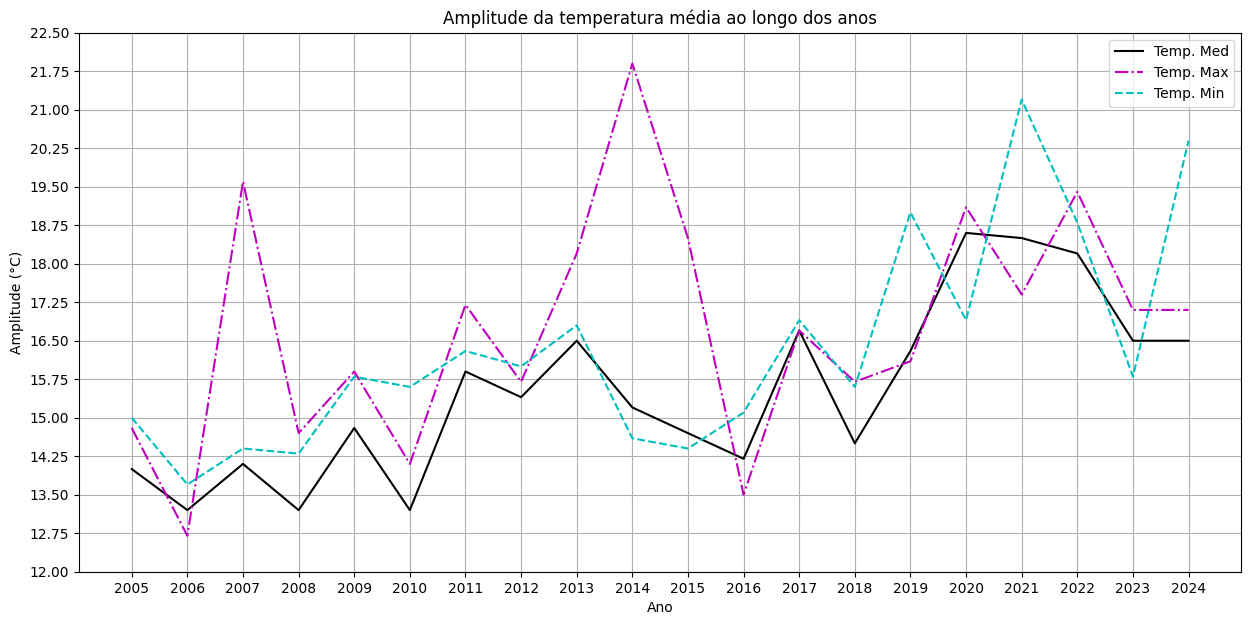

In [150]:
plt.figure(figsize = (15,7))
plt.plot(df_amplitudes.index, df_amplitudes['Ampl_Temp_Med'], c = 'k', label = 'Temp. Med', ls = '-')
plt.plot(df_amplitudes.index, df_amplitudes['Ampl_Temp_Max'], c = 'm', label = 'Temp. Max', ls = '-.')
plt.plot(df_amplitudes.index, df_amplitudes['Ampl_Temp_Min'], c = 'c', label = 'Temp. Min', ls = '--')
plt.legend()
plt.title('Amplitude da temperatura média ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Amplitude (°C)')
plt.xticks(df_amplitudes.index)
plt.yticks(np.arange(12, 23, 0.75))
plt.grid()
plt.show()

In [164]:
# Agrupar dados por meses

df_resumido_mes_ano = df_auto_inter.groupby([df_auto_inter['Data da Medição'].dt.year, df_auto_inter['Data da Medição'].dt.month])[['Temp. Min (°C)', 'Temp. Med (°C)', 'Temp. Max (°C)']].mean()

df_resumido_mes_ano.index.names = ['Ano', 'Mes']

df_resumido_mes_ano

janeiro = df_resumido_mes_ano.loc[(df_resumido_mes_ano.index.get_level_values('Mes') == 1)]


# plt.figure(figsize = (10, 5))
# plt.plot(janeiro.index.get_level_values('Ano'), janeiro['Temp. Med (°C)'], label = 'Janeiro')
# plt.legend()
# plt.xticks(janeiro.index.get_level_values('Ano'))
# plt.xlabel('Ano')
# plt.grid()
# plt.show()

,,Temp. Min (°C),Temp. Med (°C),Temp. Max (°C)
Ano,Mes,,,
2005,1,19.977419,23.209677,28.490323
2006,1,19.841935,23.900000,29.096774
2007,1,19.938710,22.967742,28.222581
2008,1,19.809677,22.874194,27.777419
2009,1,19.880645,23.322581,28.796774
2010,1,20.696774,24.258065,29.332258
2011,1,20.348387,23.461290,28.912903
2012,1,19.316129,22.361290,27.206452
2013,1,20.448387,23.287097,28.190323


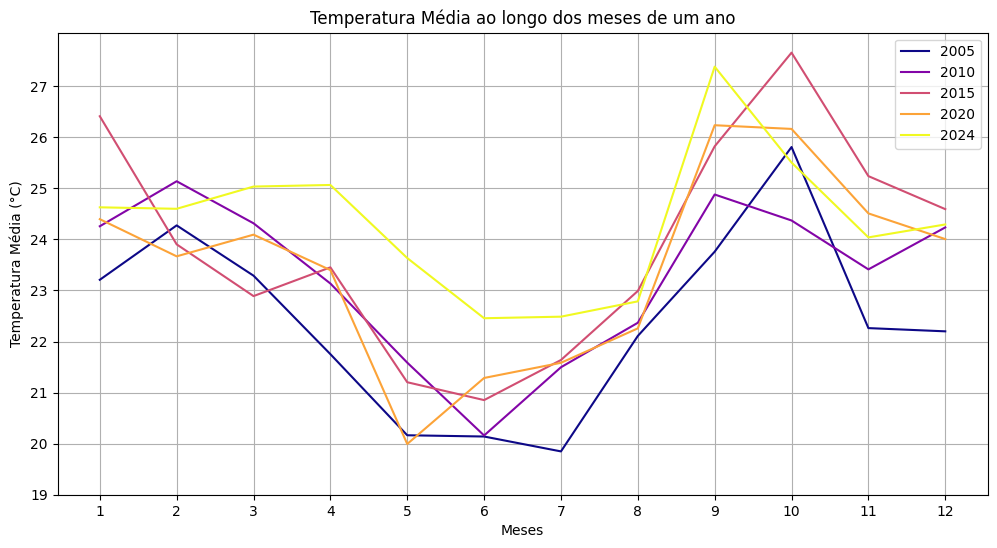

In [213]:
# Gráfico da temperatura ao longo de um ano x meses

anos_selecionados = np.array([2005, 2010, 2015, 2020, 2024])

cmap = mpl.colormaps['plasma']
norm = mpl.colors.Normalize(vmin = anos_selecionados.min(), vmax = anos_selecionados.max())

plt.figure(figsize = (12,6))
for i, ano in enumerate(anos_selecionados):
    plt.plot(meses, df_resumido_mes_ano.loc[(df_resumido_mes_ano.index.get_level_values('Ano') == ano)]['Temp. Med (°C)'], label = ano, c = cmap(norm(ano)))

plt.title('Temperatura Média ao longo dos meses de um ano')
plt.xlabel('Meses')
plt.ylabel('Temperatura Média (°C)')
plt.xticks(meses)
plt.yticks(np.arange(19, 28, 1))
plt.legend()
plt.grid()

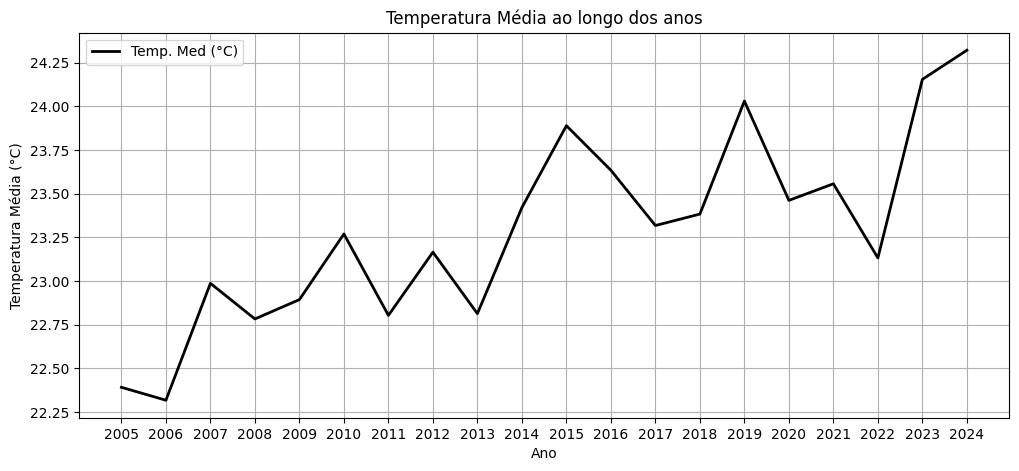

In [136]:
# Gráfico da tendência da temperatura média ao longo dos anos

plt.figure(figsize = (12,5))
plt.title('Temperatura Média ao longo dos anos')
plt.plot(df_resumido.index, df_resumido['Temp. Med (°C)']['mean'], c = 'k', label = 'Temp. Med (°C)', lw = 2)
plt.legend()
plt.xlabel('Ano')
plt.ylabel('Temperatura Média (°C)')
plt.xticks(df_resumido.index)
plt.yticks(np.arange(22.25, 24.5, 0.25))
plt.grid()
plt.show()

# Usar regressão para prever em quanto essa temperatura pode aumentar?

### Análise e previsão

In [44]:
col_selecionadas = ['Data da Medição', 'Temp. Med (°C)']
df_col_selecionadas = df_auto_inter[col_selecionadas]
df_col_selecionadas.set_index(df_auto_inter['Data da Medição'])
df_col_selecionadas = df_col_selecionadas.rename(columns={'Data da Medição': 'ds', 'Temp. Med (°C)': 'y'})
df_col_selecionadas

,ds,y
0,2005-01-01,23.3
1,2005-01-02,23.1
2,2005-01-03,22.9
3,2005-01-04,22.8
4,2005-01-05,22.6
...,...,...
7300,2024-12-27,21.2
7301,2024-12-28,22.6
7302,2024-12-29,22.4
7303,2024-12-30,24.0


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnulj4vne/abs29scb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnulj4vne/62ch7xqw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86165', 'data', 'file=/tmp/tmpnulj4vne/abs29scb.json', 'init=/tmp/tmpnulj4vne/62ch7xqw.json', 'output', 'file=/tmp/tmpnulj4vne/prophet_modelf6z58bno/prophet_model-20250123204036.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:40:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:40:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


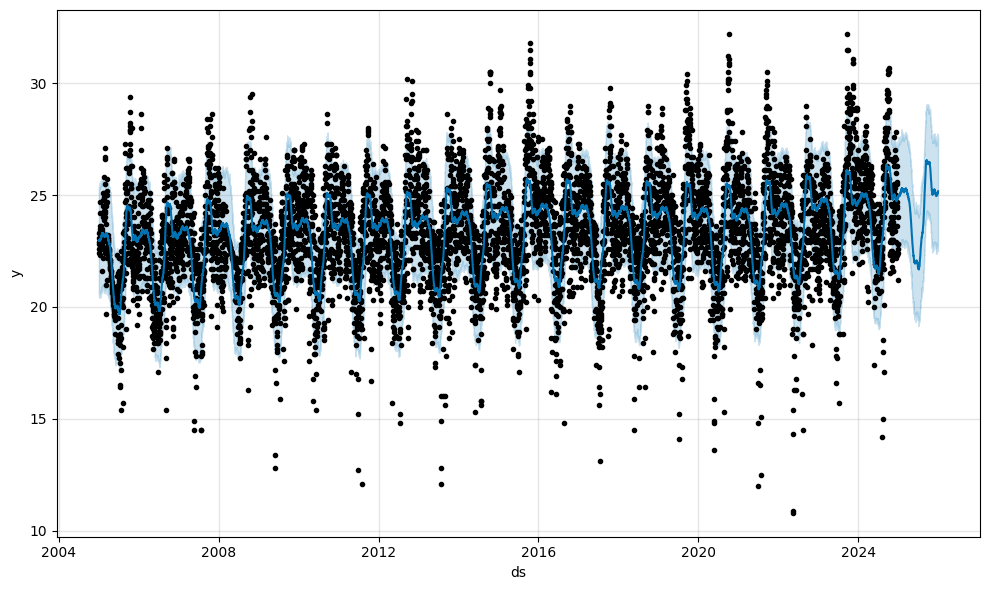

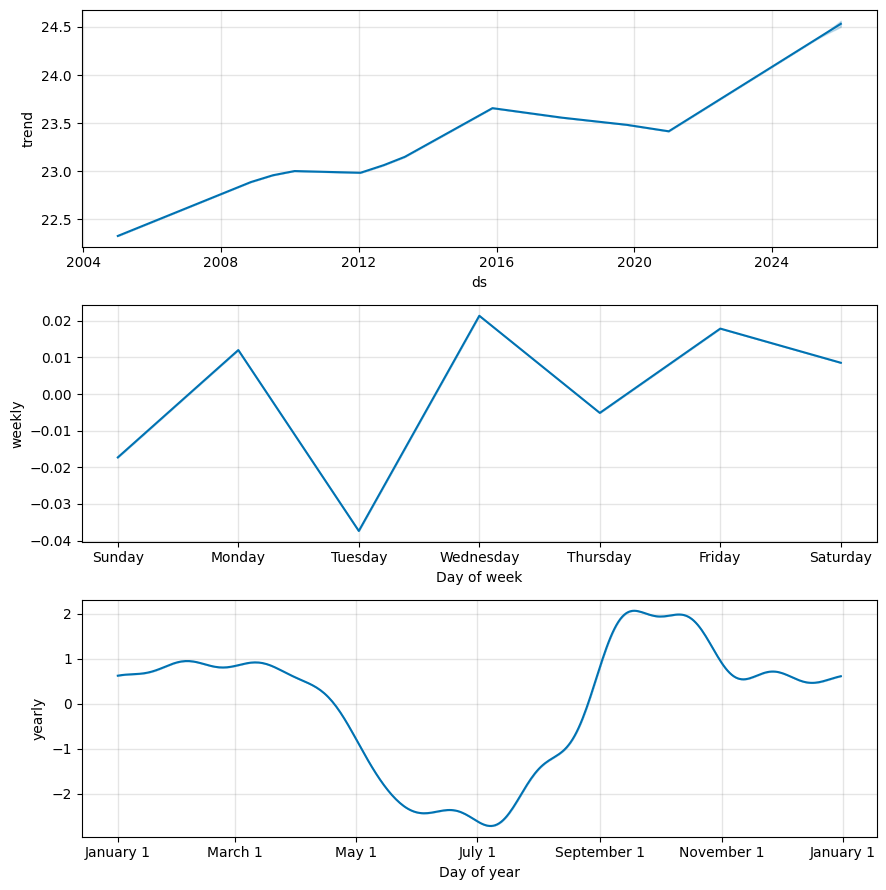

In [46]:
model = Prophet()
model.fit(df_col_selecionadas)
future = model.make_future_dataframe(periods = 365, freq = 'D')
forecast = model.predict(future)
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)
plt.show()

In [47]:
# Imprimindo as previsões
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(365))

             ds       yhat  yhat_lower  yhat_upper
7305 2025-01-01  24.956697   22.421594   27.228477
7306 2025-01-02  24.938303   22.523723   27.290977
7307 2025-01-03  24.968241   22.593164   27.417124
7308 2025-01-04  24.964658   22.750500   27.275646
7309 2025-01-05  24.943540   22.555496   27.595756
...         ...        ...         ...         ...
7665 2025-12-27  25.105560   22.623006   27.741797
7666 2025-12-28  25.093432   22.764666   27.561705
7667 2025-12-29  25.135753   22.568396   27.481723
7668 2025-12-30  25.098388   22.491792   27.495144
7669 2025-12-31  25.168113   22.831217   27.628944

[365 rows x 4 columns]


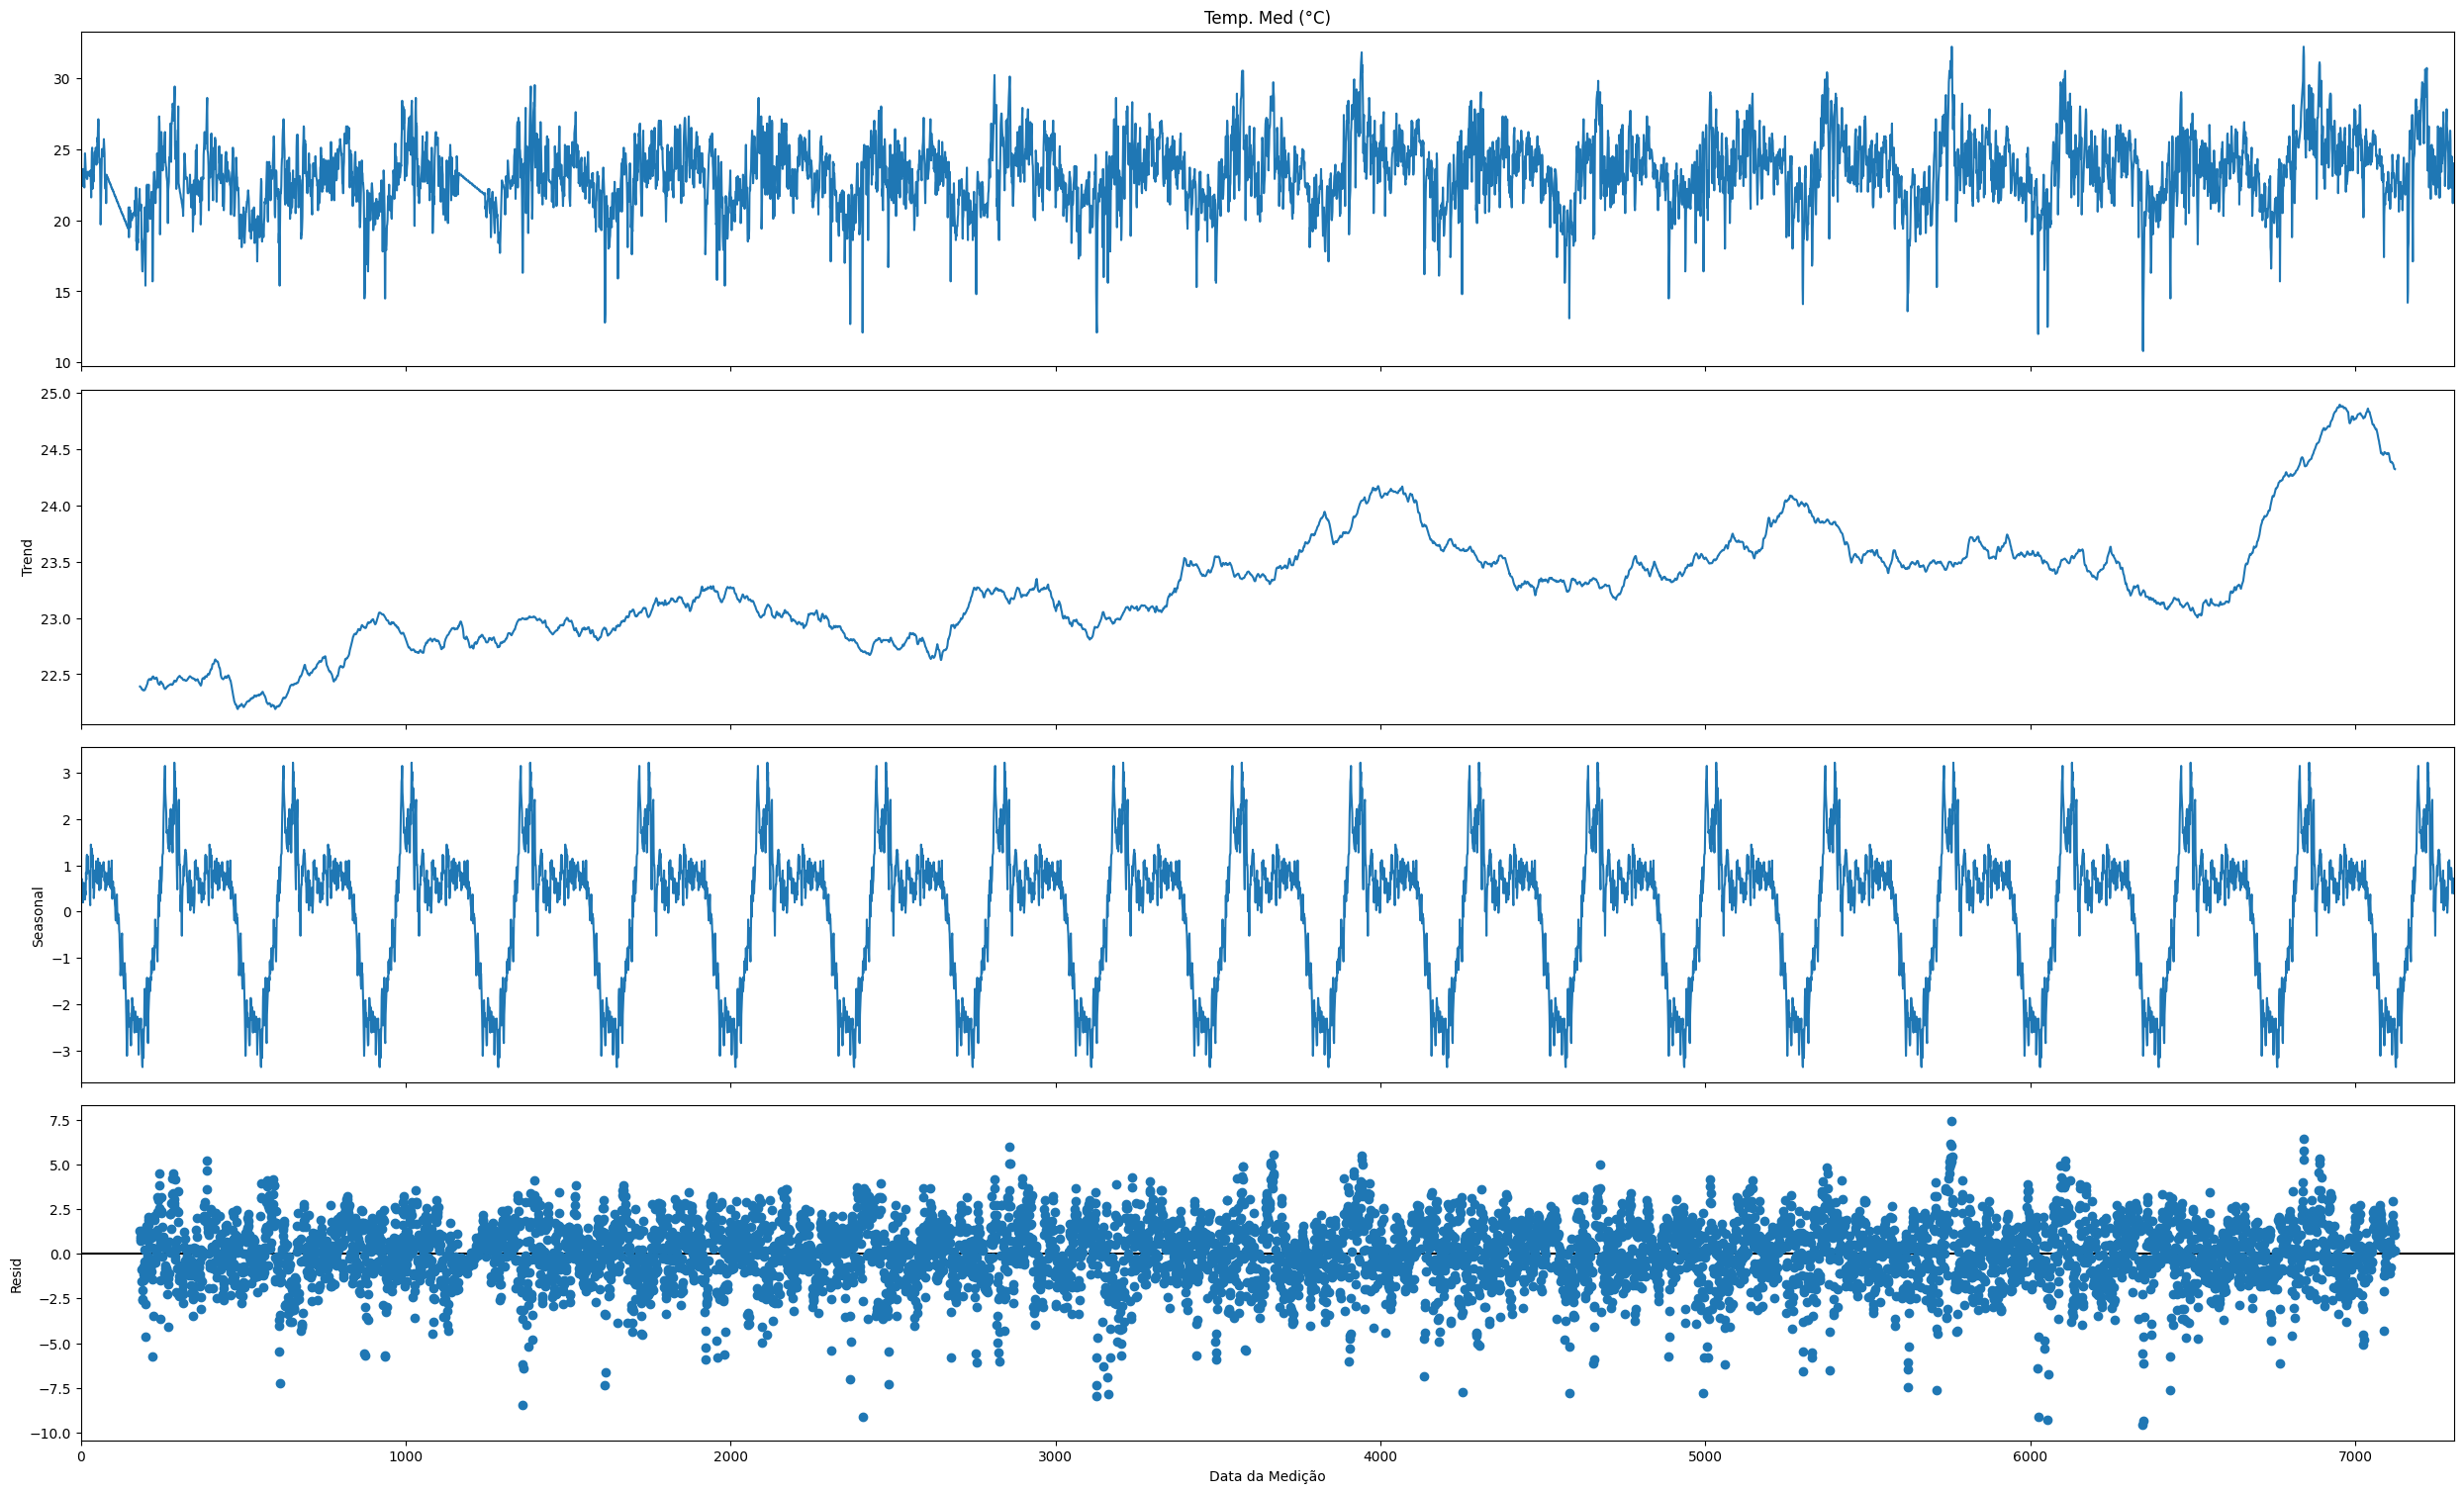

In [150]:
from statsmodels.tsa.seasonal import seasonal_decompose

# df_auto_inter = df_auto_inter.asfreq('D')

decomposition = seasonal_decompose(df_auto_inter['Temp. Med (°C)'], model = 'additive', period = 365)

# decomposition.observed.plot()
# decomposition.seasonal.plot()
# decomposition.trend.plot()
# decomposition.resid.plot()

fig = decomposition.plot()
fig.set_size_inches(25, 15)
plt.tight_layout()
plt.xlabel('Data da Medição')
plt.show()